In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

path = './data/road-game-default-rtdb-export.json'

branchs = ['all-games','complete-games']
childs = ['additional_comments',
          'log',
         'aggressively_value',
         'behavior',
         'birthYear',
         'computer_value',
         'drivinglicense',
         'education',
         'gender',
         'generously_value',
         'redScore',
          'blueScore',
         'steps',
         'win',
         'wisely_value']

# with open(path) as json_file:
#     data = json.load(json_file)
#     num_of_games = len(data[branchs[1]])
#     print("number of %s is %d" % (branchs[1], num_of_games))
#     for game_id in data[branchs[1]].values():
#         for child in childs:
#             print(child, game_id[child])
#         print()

In [2]:
#load data from the json file
with open(path) as train_file:
    data = json.load(train_file)

In [3]:
branch = branchs[1]
df = pd.DataFrame.from_dict(data[branch], orient='index')
df.reset_index(level=0, inplace=True)
df

,index,additional_comments,aggressively_value,behavior,birthYear,blueScore,computer_value,drivinglicense,education,gender,generously_value,log,press-the-read-instructions-button,redScore,steps,win,wisely_value
0,-MZiWIwdnrn8TJ034z2w,,5,carefulBehavior,1961,-10,5,valid,BA,male,6,"[None, {'blue': 'from: a6, action: left', 'red...",True,3,7,True,1
1,-MZiWUxZs8BvWglGhc9r,,2,carefulBehavior,1982,-11,6,valid,BA,female,4,"[None, {'blue': 'from: a6, action: left', 'red...",True,2,8,True,4
2,-MZiWYgxyToIiCSDQY8S,,5,aggressiveBehavior,1953,-94,7,valid,BA,female,2,"[None, {'blue': 'from: a6, action: left', 'red...",True,-105,5,False,6
3,-MZiWYz_z_BcQlpReXf_,,6,aggressiveBehavior,1990,6,7,valid,Master's degree,male,2,"[None, {'blue': 'from: a6, action: left', 'red...",True,1,9,True,2
4,-MZiWaNZ6n3K3AZDfr-q,,6,aggressiveBehavior,1953,-94,6,valid,BA,female,2,"[None, {'blue': 'from: a6, action: left', 'red...",True,-105,5,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,-M_HdrkTl2-M1kF0d3Va,,3,randomBehavior,1960,-132,5,invalid,BA,female,5,"[None, {'blue': 'from: a6, action: stay', 'red...",True,-112,22,True,5
131,-M_HefdTaP5SV-i0bz7G,fastgame.,6,randomBehavior,1990,-108,7,valid,none,male,2,"[None, {'blue': 'from: a6, action: left', 'red...",True,-105,5,False,4
132,-M_HjGWXEG1wJ2kWwvbt,,2,randomBehavior,1994,-108,5,valid,BA,male,4,"[None, {'blue': 'from: a6, action: stay', 'red...",True,-105,5,False,4
133,-M_Hl4knjjAplOUpBQgF,,2,randomBehavior,1979,-13,7,invalid,High School,female,4,"[None, {'blue': 'from: a6, action: stay', 'red...",True,3,7,True,4


In [4]:
df.columns

Index(['index', 'additional_comments', 'aggressively_value', 'behavior',
       'birthYear', 'blueScore', 'computer_value', 'drivinglicense',
       'education', 'gender', 'generously_value', 'log',
       'press-the-read-instructions-button', 'redScore', 'steps', 'win',
       'wisely_value'],
      dtype='object')

## Survay results: 

In [5]:
df['additional_comments']

0                
1                
2                
3                
4                
          ...    
130              
131    fastgame. 
132              
133              
134              
Name: additional_comments, Length: 135, dtype: object

In [6]:
df[['aggressively_value', 'computer_value', 'generously_value', 'generously_value']] = df[['aggressively_value', 'computer_value', 'generously_value', 'generously_value']].apply(pd.to_numeric)

In [7]:
df.groupby(['behavior']).mean()

,aggressively_value,blueScore,computer_value,generously_value,press-the-read-instructions-button,redScore,steps,win
behavior,,,,,,,,
aggressiveBehavior,4.967742,-35.548387,6.096774,2.870968,1.0,-38.967742,6.387097,0.612903
carefulBehavior,2.964286,-9.428571,5.214286,5.071429,1.0,2.285714,7.714286,1.000000
randomBehavior,4.142857,-77.057143,5.742857,4.285714,1.0,-69.257143,8.971429,0.542857
semiAggressiveBehavior,4.390244,-72.000000,6.048780,3.024390,1.0,-74.121951,6.317073,0.292683


In [8]:
df.groupby('behavior').describe()

aggressively_value                                     \
                                    count      mean       std  min  25%  50%   
behavior                                                                       
aggressiveBehavior                   31.0  4.967742  1.852635  1.0  4.0  5.0   
carefulBehavior                      28.0  2.964286  1.621205  1.0  2.0  2.0   
randomBehavior                       35.0  4.142857  1.972500  1.0  2.0  4.0   
semiAggressiveBehavior               41.0  4.390244  1.998475  1.0  3.0  4.0   

                                  blueScore             ... redScore       \
                         75%  max     count       mean  ...      75%  max   
behavior                                                ...                 
aggressiveBehavior      6.50  7.0      31.0 -35.548387  ...      2.5  3.0   
carefulBehavior         4.25  6.0      28.0  -9.428571  ...      3.0  5.0   
randomBehavior          6.00  7.0      35.0 -77.057143  ...      0.0  5.0   
semiAggressiveBehavior  6.00  7.0      41.0 -72.000000  ...     -1.0  1.0   

                       steps                                                  
                       count      mean       std  min  25%  50%    75%   max  
behavior                                                                      
aggressiveBehavior      31.0  6.387097  2.155264  3.0  4.5  7.0   8.00  11.0  
carefulBehavior         28.0  7.714286  2.536506  5.0  7.0  7.0   8.25  18.0  
randomBehavior          35.0  8.971429  5.987662  3.0  5.0  7.0  10.00  35.0  
semiAggressiveBehavior  41.0  6.317073  3.101927  3.0  4.0  5.0   9.00  14.0  

[4 rows x 48 columns]

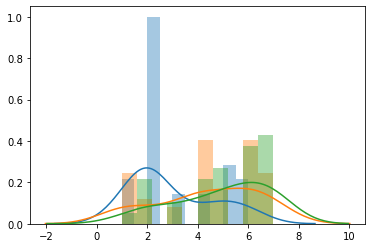

In [9]:
# Sort the dataframe by target
target_0 = df.loc[df['behavior'] == 'carefulBehavior']
target_1 = df.loc[df['behavior'] == 'semiAggressiveBehavior']
target_2 = df.loc[df['behavior'] == 'aggressiveBehavior']

sns.distplot(target_0[['aggressively_value']], bins = 10)
sns.distplot(target_1[['aggressively_value']], bins = 10)
sns.distplot(target_2[['aggressively_value']], bins = 10)

In [10]:
target_0[target_0['aggressively_value'] == '3'].count()

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


index                                 0
additional_comments                   0
aggressively_value                    0
behavior                              0
birthYear                             0
blueScore                             0
computer_value                        0
drivinglicense                        0
education                             0
gender                                0
generously_value                      0
log                                   0
press-the-read-instructions-button    0
redScore                              0
steps                                 0
win                                   0
wisely_value                          0
dtype: int64

In [11]:
target_0.count()

index                                 28
additional_comments                   28
aggressively_value                    28
behavior                              28
birthYear                             28
blueScore                             28
computer_value                        28
drivinglicense                        28
education                             28
gender                                28
generously_value                      28
log                                   28
press-the-read-instructions-button    28
redScore                              28
steps                                 28
win                                   28
wisely_value                          28
dtype: int64

Text(0.5, 0, 'aggressively_value')

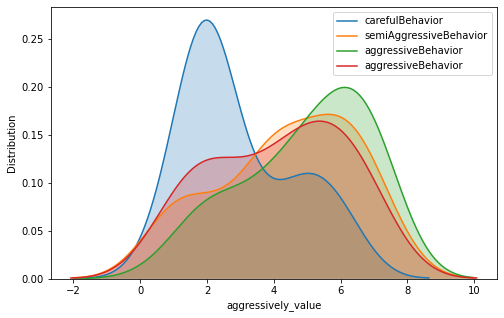

In [12]:
fig,(ax1) = plt.subplots(ncols=1, figsize=(8,5))
sns.kdeplot(df.aggressively_value[df['behavior'] == 'carefulBehavior'], label='carefulBehavior', shade=True)
sns.kdeplot(df.aggressively_value[df['behavior'] == 'semiAggressiveBehavior'], label='semiAggressiveBehavior', shade=True)
sns.kdeplot(df.aggressively_value[df['behavior'] == 'aggressiveBehavior'], label='aggressiveBehavior', shade=True)
sns.kdeplot(df.aggressively_value[df['behavior'] == 'randomBehavior'], label='aggressiveBehavior', shade=True)
ax1.set_ylabel('Distribution')
ax1.set_xlabel('aggressively_value')

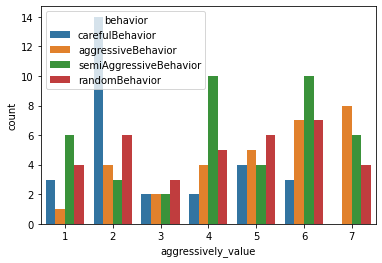

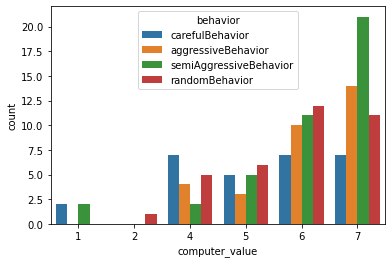

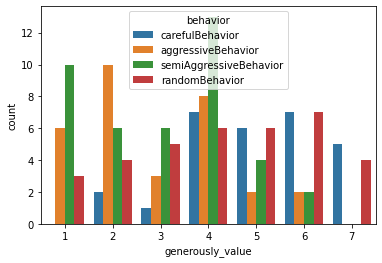

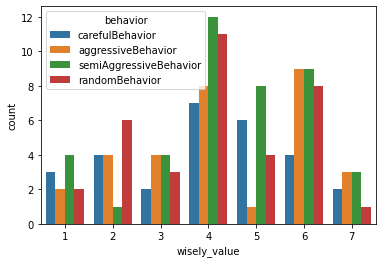

In [13]:
def count_plot_by_behavior(feature):
    sns.countplot(x=df[feature],hue=df['behavior'])
    plt.show()
    
for value in ['aggressively_value', 'computer_value', 'generously_value', 'wisely_value']:
    count_plot_by_behavior(value)

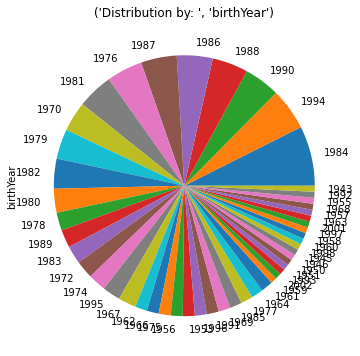

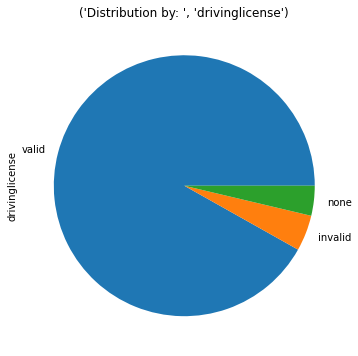

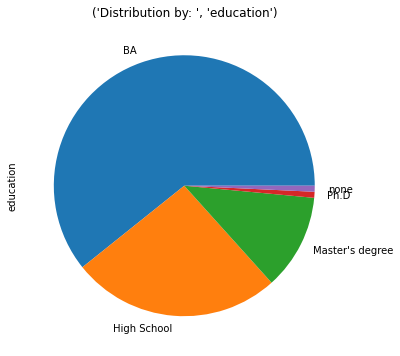

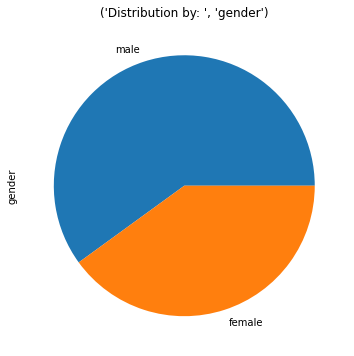

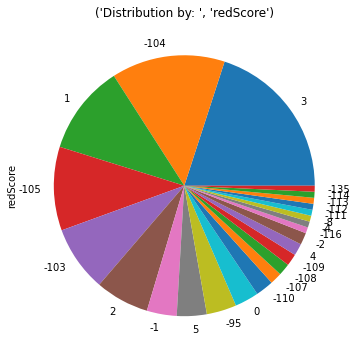

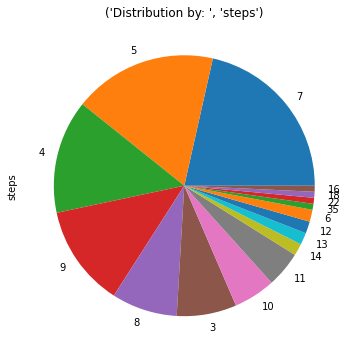

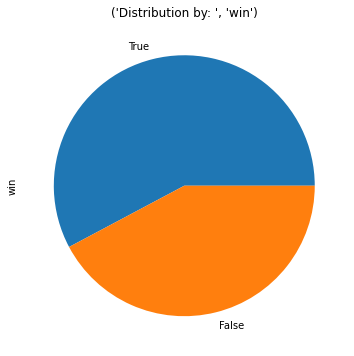

In [14]:
def pie_count_plot(feature):
    list_gen=df[feature].value_counts().plot.pie(figsize=(6, 6))
    title = 'Distribution by: ', feature
    plt.title(title)
    plt.show()
    
for value in ['birthYear', 'drivinglicense', 'education', 'gender', 'redScore', 'steps', 'win']:
    pie_count_plot(value)

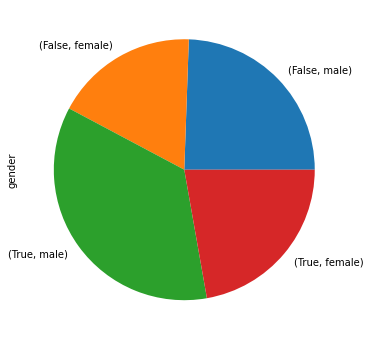

In [15]:
df.groupby('win')['gender'].value_counts().plot.pie(figsize=(6, 6))

In [16]:
df.groupby('gender').describe()

aggressively_value                                                \
                    count      mean       std  min  25%  50%   75%  max   
gender                                                                    
female               54.0  3.870370  1.833095  1.0  2.0  4.0  5.75  7.0   
male                 81.0  4.358025  2.069472  1.0  2.0  5.0  6.00  7.0   

       blueScore             ... redScore      steps                           \
           count       mean  ...      75%  max count      mean       std  min   
gender                       ...                                                
female      54.0 -53.814815  ...      2.0  3.0  54.0  7.277778  3.482661  3.0   
male        81.0 -50.728395  ...      3.0  5.0  81.0  7.333333  4.245586  3.0   

                             
        25%  50%  75%   max  
gender                       
female  5.0  7.0  8.0  22.0  
male    5.0  7.0  9.0  35.0  

[2 rows x 48 columns]

In [17]:
df.groupby('behavior').describe()

aggressively_value                                     \
                                    count      mean       std  min  25%  50%   
behavior                                                                       
aggressiveBehavior                   31.0  4.967742  1.852635  1.0  4.0  5.0   
carefulBehavior                      28.0  2.964286  1.621205  1.0  2.0  2.0   
randomBehavior                       35.0  4.142857  1.972500  1.0  2.0  4.0   
semiAggressiveBehavior               41.0  4.390244  1.998475  1.0  3.0  4.0   

                                  blueScore             ... redScore       \
                         75%  max     count       mean  ...      75%  max   
behavior                                                ...                 
aggressiveBehavior      6.50  7.0      31.0 -35.548387  ...      2.5  3.0   
carefulBehavior         4.25  6.0      28.0  -9.428571  ...      3.0  5.0   
randomBehavior          6.00  7.0      35.0 -77.057143  ...      0.0  5.0   
semiAggressiveBehavior  6.00  7.0      41.0 -72.000000  ...     -1.0  1.0   

                       steps                                                  
                       count      mean       std  min  25%  50%    75%   max  
behavior                                                                      
aggressiveBehavior      31.0  6.387097  2.155264  3.0  4.5  7.0   8.00  11.0  
carefulBehavior         28.0  7.714286  2.536506  5.0  7.0  7.0   8.25  18.0  
randomBehavior          35.0  8.971429  5.987662  3.0  5.0  7.0  10.00  35.0  
semiAggressiveBehavior  41.0  6.317073  3.101927  3.0  4.0  5.0   9.00  14.0  

[4 rows x 48 columns]

# Statistics of the red agent movements:

### Create the statistics table from the log column: 

In [18]:
import flat_table

In [19]:
statistics_raw = pd.DataFrame.from_dict(data['all-games'], orient='index')
log_red = flat_table.normalize(statistics_raw).iloc[:,-2:]
log_red = log_red.dropna()
log_red['log.red'] = log_red['log.red'] + ' ' + log_red['log.blue']
log_red = log_red.drop('log.blue', axis=1)
log_red['log.red'] = log_red.apply(lambda x: x['log.red'].rsplit(' ', 1)[0], axis = 1)
for substr in ['from: ', ', action:']:
    log_red['log.red'] = log_red.apply(lambda x: x['log.red'].replace(substr, '', 2), axis = 1)
log_red['log.red'] = log_red['log.red'].str.split().apply(reversed).apply(' '.join)
log_red['value']=1
log_red['action'] = log_red['log.red'].str.split().str[1]
log_red['log.red'] = log_red.apply(lambda x: x['log.red'].replace(str(x['action'])+' ', '', 2), axis = 1)

log_red = log_red.groupby(['log.red', 'action']).count()
log_red.reset_index(inplace=True)
log_red = log_red.set_index('log.red')
log_red.sort_index()

,action,value
log.red,,
a1 a2,right,5
a1 a3,right,24
a1 a4,right,32
a1 a5,down,3
a1 a5,right,36
...,...,...
b6 a5,right,10
b6 b1,stay,11
b6 b1,up,1


In [20]:
len(log_red.index)

150

In [21]:
idx = log_red.index.drop_duplicates()
result = pd.DataFrame(index=log_red.index.drop_duplicates(), columns=['right', 'stay', 'up', 'down'])
# result.reset_index(level=0, inplace=True)
for action in ['right', 'stay', 'up', 'down']:
    result[action] = log_red[log_red['action'] == action]['value']
result = result.fillna(0)
result.sort_index()

,right,stay,up,down
log.red,,,,
a1 a2,5.0,0.0,0.0,0.0
a1 a3,24.0,0.0,0.0,0.0
a1 a4,32.0,0.0,0.0,0.0
a1 a5,36.0,2.0,0.0,3.0
a1 b1,0.0,19.0,5.0,0.0
...,...,...,...,...
b6 a4,10.0,1.0,0.0,0.0
b6 a5,10.0,0.0,0.0,0.0
b6 b1,0.0,11.0,1.0,0.0


#### After Laplace's Smoothing:

In [22]:
result = result + 1
result

,right,stay,up,down
log.red,,,,
a1 a2,6.0,1.0,1.0,1.0
a1 a3,25.0,1.0,1.0,1.0
a1 a4,33.0,1.0,1.0,1.0
a1 a5,37.0,3.0,1.0,4.0
a1 b1,1.0,20.0,6.0,1.0
...,...,...,...,...
b6 a4,11.0,2.0,1.0,1.0
b6 a5,11.0,1.0,1.0,1.0
b6 b1,1.0,12.0,2.0,1.0


#### Convert it to Probability table:

In [23]:
pd.options.display.float_format = "{:,.2f}".format
result_probs = result.div(result.sum(axis=1), axis=0)

#### Save data on computer for the policy iteration:

In [24]:
# with open('data/states.txt', 'w') as f:
#     for state in result.index.to_list():
#         f.write("%s\n" % state)

In [25]:
result_probs.to_json('data/probs.json' , orient='index', indent=4)

### Create the statistics table from the statistics branch: 

In [26]:
red_moves = pd.DataFrame.from_dict(data['statistics'], orient='index')
# red_moves.reset_index(level=0, inplace=True)
red_moves = red_moves.fillna(0)
red_moves.sort_index()

,right,stay,up,down
a1 a2,5.00,0.00,0.00,0.00
a1 a3,24.00,0.00,0.00,0.00
a1 a4,32.00,0.00,0.00,0.00
a1 a5,34.00,0.00,0.00,0.00
a1 b1,0.00,17.00,5.00,0.00
a1 b2,0.00,0.00,3.00,0.00
a1 b3,0.00,3.00,2.00,0.00
a2 a1,2.00,4.00,0.00,4.00
a2 a3,8.00,0.00,0.00,0.00
a2 a4,2.00,0.00,0.00,0.00


#### Convert it to Probability table:

In [27]:
pd.options.display.float_format = "{:,.2f}".format
red_moves.div(red_moves.sum(axis=1), axis=0)

,right,stay,up,down
a1 a2,1.00,0.00,0.00,0.00
a1 a3,1.00,0.00,0.00,0.00
a1 a4,1.00,0.00,0.00,0.00
a1 a5,1.00,0.00,0.00,0.00
a2 a1,0.20,0.40,0.00,0.40
a2 a3,1.00,0.00,0.00,0.00
a2 a4,1.00,0.00,0.00,0.00
a3 a1,0.30,0.50,0.00,0.20
a3 a2,0.22,0.06,0.00,0.72
a3 a5,1.00,0.00,0.00,0.00


In [28]:
import numpy as np
import pprint

In [29]:
'''==================================================
Initial set up
=================================================='''

#Hyperparameters
SMALL_ENOUGH = 0.005
GAMMA = 0.99
NOISE = 0.10

#Define all states
all_states=[]
for i in range(12):
    for j in range(12):
            all_states.append((i,j))

#Define rewards for all states
rewards = {}
# for i in all_states:
#     if i == (1,2):
#         rewards[i] = -1
#     elif i == (2,2):
#         rewards[i] = -1
#     elif i == (2,3):
#         rewards[i] = 1
#     else:
#         rewards[i] = 0
for (i,j) in all_states:
    if(i == 0): # blue agent in a1
        rewards[(i,j)] = 10
    elif(i == j): # crushed
        rewards[(i,j)] = -100
    else:
        rewards[(i,j)] = -1

#Dictionnary of possible actions. We have two "end" states (1,2 and 2,2)
actions = {}
#     (0,0):('D', 'R'), 
#     (0,1):('D', 'R', 'L'),    
#     (0,2):('D', 'L', 'R'),
#     (0,3):('D', 'L'),
#     (1,0):('D', 'U', 'R'),
#     (1,1):('D', 'R', 'L', 'U'),
#     (1,3):('D', 'L', 'U'),
#     (2,0):('U', 'R'),
#     (2,1):('U', 'L', 'R'),
#     }
for (i,j) in all_states:
    if i != 0 and i != j: #if s=(i, j) is not an "end" state
        actions[(i,j)] = ('S', 'L', 'D') if (i < 6) else ('U', 'S')

#Define an initial policy
policy={}
for s in actions.keys():
    policy[s] = np.random.choice(actions[s])

#Define initial value function 
V={}
# for s in all_states:
#     if s in actions.keys():
#         V[s] = 0
#     if s ==(2,2):
#         V[s]=-1
#     if s == (1,2):
#         V[s]=-1
#     if s == (2,3):
#         V[s]=1
for (i,j) in all_states:
    if s in actions.keys():
        V[(i,j)] = -1
    if(i == 0): # blue agent in a1
        V[(i,j)] = 10
    if(i == j): # crushed
        V[(i,j)] = -100

In [30]:
print('all_states: ', all_states)

all_states:  [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (10, 0

In [31]:
print('rewards: ', rewards)

rewards:  {(0, 0): 10, (0, 1): 10, (0, 2): 10, (0, 3): 10, (0, 4): 10, (0, 5): 10, (0, 6): 10, (0, 7): 10, (0, 8): 10, (0, 9): 10, (0, 10): 10, (0, 11): 10, (1, 0): -1, (1, 1): -100, (1, 2): -1, (1, 3): -1, (1, 4): -1, (1, 5): -1, (1, 6): -1, (1, 7): -1, (1, 8): -1, (1, 9): -1, (1, 10): -1, (1, 11): -1, (2, 0): -1, (2, 1): -1, (2, 2): -100, (2, 3): -1, (2, 4): -1, (2, 5): -1, (2, 6): -1, (2, 7): -1, (2, 8): -1, (2, 9): -1, (2, 10): -1, (2, 11): -1, (3, 0): -1, (3, 1): -1, (3, 2): -1, (3, 3): -100, (3, 4): -1, (3, 5): -1, (3, 6): -1, (3, 7): -1, (3, 8): -1, (3, 9): -1, (3, 10): -1, (3, 11): -1, (4, 0): -1, (4, 1): -1, (4, 2): -1, (4, 3): -1, (4, 4): -100, (4, 5): -1, (4, 6): -1, (4, 7): -1, (4, 8): -1, (4, 9): -1, (4, 10): -1, (4, 11): -1, (5, 0): -1, (5, 1): -1, (5, 2): -1, (5, 3): -1, (5, 4): -1, (5, 5): -100, (5, 6): -1, (5, 7): -1, (5, 8): -1, (5, 9): -1, (5, 10): -1, (5, 11): -1, (6, 0): -1, (6, 1): -1, (6, 2): -1, (6, 3): -1, (6, 4): -1, (6, 5): -1, (6, 6): -100, (6, 7): -1, (6, 8

In [32]:
print('actions: ', actions)

actions:  {(1, 0): ('S', 'L', 'D'), (1, 2): ('S', 'L', 'D'), (1, 3): ('S', 'L', 'D'), (1, 4): ('S', 'L', 'D'), (1, 5): ('S', 'L', 'D'), (1, 6): ('S', 'L', 'D'), (1, 7): ('S', 'L', 'D'), (1, 8): ('S', 'L', 'D'), (1, 9): ('S', 'L', 'D'), (1, 10): ('S', 'L', 'D'), (1, 11): ('S', 'L', 'D'), (2, 0): ('S', 'L', 'D'), (2, 1): ('S', 'L', 'D'), (2, 3): ('S', 'L', 'D'), (2, 4): ('S', 'L', 'D'), (2, 5): ('S', 'L', 'D'), (2, 6): ('S', 'L', 'D'), (2, 7): ('S', 'L', 'D'), (2, 8): ('S', 'L', 'D'), (2, 9): ('S', 'L', 'D'), (2, 10): ('S', 'L', 'D'), (2, 11): ('S', 'L', 'D'), (3, 0): ('S', 'L', 'D'), (3, 1): ('S', 'L', 'D'), (3, 2): ('S', 'L', 'D'), (3, 4): ('S', 'L', 'D'), (3, 5): ('S', 'L', 'D'), (3, 6): ('S', 'L', 'D'), (3, 7): ('S', 'L', 'D'), (3, 8): ('S', 'L', 'D'), (3, 9): ('S', 'L', 'D'), (3, 10): ('S', 'L', 'D'), (3, 11): ('S', 'L', 'D'), (4, 0): ('S', 'L', 'D'), (4, 1): ('S', 'L', 'D'), (4, 2): ('S', 'L', 'D'), (4, 3): ('S', 'L', 'D'), (4, 5): ('S', 'L', 'D'), (4, 6): ('S', 'L', 'D'), (4, 7): 

In [33]:
print('V: ', V)

V:  {(0, 0): -100, (0, 1): 10, (0, 2): 10, (0, 3): 10, (0, 4): 10, (0, 5): 10, (0, 6): 10, (0, 7): 10, (0, 8): 10, (0, 9): 10, (0, 10): 10, (0, 11): 10, (1, 0): -1, (1, 1): -100, (1, 2): -1, (1, 3): -1, (1, 4): -1, (1, 5): -1, (1, 6): -1, (1, 7): -1, (1, 8): -1, (1, 9): -1, (1, 10): -1, (1, 11): -1, (2, 0): -1, (2, 1): -1, (2, 2): -100, (2, 3): -1, (2, 4): -1, (2, 5): -1, (2, 6): -1, (2, 7): -1, (2, 8): -1, (2, 9): -1, (2, 10): -1, (2, 11): -1, (3, 0): -1, (3, 1): -1, (3, 2): -1, (3, 3): -100, (3, 4): -1, (3, 5): -1, (3, 6): -1, (3, 7): -1, (3, 8): -1, (3, 9): -1, (3, 10): -1, (3, 11): -1, (4, 0): -1, (4, 1): -1, (4, 2): -1, (4, 3): -1, (4, 4): -100, (4, 5): -1, (4, 6): -1, (4, 7): -1, (4, 8): -1, (4, 9): -1, (4, 10): -1, (4, 11): -1, (5, 0): -1, (5, 1): -1, (5, 2): -1, (5, 3): -1, (5, 4): -1, (5, 5): -100, (5, 6): -1, (5, 7): -1, (5, 8): -1, (5, 9): -1, (5, 10): -1, (5, 11): -1, (6, 0): -1, (6, 1): -1, (6, 2): -1, (6, 3): -1, (6, 4): -1, (6, 5): -1, (6, 6): -100, (6, 7): -1, (6, 8): -

In [ ]:
'''==================================================
Value Iteration
=================================================='''

iteration = 0

while True:
    biggest_change = 0
    for s in all_states:            
        if s in policy:
            
            old_v = V[s]
            new_v = 0
            
            for a in actions[s]:
                if a == 'U':
                    nxt = [s[0]-5, s[1]]
                if a == 'D':
                    nxt = [s[0]+5, s[1]]
                if a == 'L':
                    nxt = [s[0]-1, s[1]]
                if a == 'S':
                    nxt = [s[0], s[1]]
                
                #Choose a new random action to do (transition probability)
                random_1=np.random.choice([i for i in actions[s] if i != a])
                if random_1 == 'U':
                    act = [s[0]-5, s[1]]
                if random_1 == 'D':
                    act = [s[0]+5, s[1]]
                if random_1 == 'L':
                    act = [s[0]-1, s[1]]
                if random_1 == 'S':
                    act = [s[0], s[1]]
                
                #Calculate the value
                nxt = tuple(nxt)
                act = tuple(act)
                v = rewards[s] + (GAMMA * ((1-NOISE)* V[nxt] + (NOISE * V[act]))) 
                if v > new_v: #Is this the best action so far? If so, keep it
                    new_v = v
                    policy[s] = a

       #Save the best of all actions for the state                                
            V[s] = new_v
            biggest_change = max(biggest_change, np.abs(old_v - V[s]))

            
   #See if the loop should stop now         
    if biggest_change < SMALL_ENOUGH:
        break
    iteration += 1



In [ ]:
# print the results:
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(iteration)
pp.pprint(V)